# Fits for Average Cross Section

## Fits for Camila Data



In [7]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from PlotSettings import MainColor1, MainColor2, MainColor3, BackgroundColor1, BackgroundColor2, BackgroundColor3, Gray1, Gray2, plt

alphaDM = 0.000509


############## Functions ###############
def sigmaviscosity(mchi, mphi, V, alphax= alphaDM):
    w  = 300*(mphi/(10))*(10/(mchi))
    st = (275.73)*(alphax/0.01)**2*(mchi/10.0)*(10.0/(mphi))**(4)
    sv = 6*st*(w**6/(V**6))*((2+V**2/(w**2))*np.log(1+V**2/(w**2))-2*V**2/w**2)
    return sv


def Integrand_sigmaviscosity(v, v0, M, m):
    return sigmaviscosity(v, M, m)*v*np.exp(-0.5*v**2/v0**2)*v**2



def Average_sigmaviscosity(v0, M, m):
    sigma2_MB = v0**2*np.pi*(3*np.pi - 8)/np.pi
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 * m)
    Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
    return Prefactor*Integral

# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params,  x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Average_sigmaviscosity(x, M, m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


############## Camila Data ###############

CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2

print("Fits for Camila Data")
M_ini, m_ini = 50, 6
initial = [M_ini, m_ini]
bestfit_Correa = minimize(compute_chi2, initial, method='Nelder-Mead')

M_beftfit_Correa, m_bestfit_Correa = bestfit_Correa.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(m_bestfit_Correa))
print('m = {0:.2f} GeV'.format(m_bestfit_Correa))
print("Chi-squared:", compute_chi2((m_bestfit_Correa, m_bestfit_Correa)))


Fits for Camila Data


C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\3624703435.py:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\3624703435.py:27: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\3624703435.py:27: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation tab

Best Fit Parameters
M = 5.88 MeV
m = 5.88 GeV
Chi-squared: 113.88553465016167


plot for this fit:

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\3624703435.py:27: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\3624703435.py:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\3624703435.py:27: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation tab

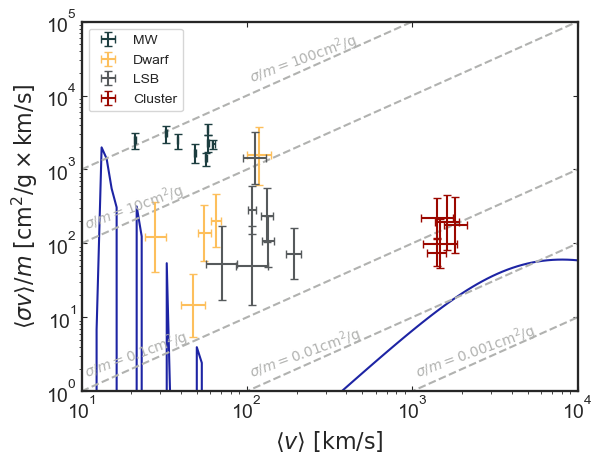

In [8]:
v_array = np.logspace(1, 4, 100)
v0 = v_array*np.sqrt(np.pi)/4

sigvm_array = np.zeros(100)

for i in range(100):
    sigvm_array[i] = Average_sigmaviscosity(v0[i], M_beftfit_Correa, m_bestfit_Correa)
    
# Plot Best Fit

#Model Plot
plt.plot(v_array, sigvm_array, color=MainColor1)

rot = 20
#Cross section diagonals
plt.plot(v_array, 0.001*v_array, color=Gray2, linestyle='dashed')
plt.text(1000, 1.5, r'$ \sigma/m = 0.001 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)
plt.plot(v_array, 0.01*v_array, color=Gray2, linestyle='dashed')
plt.text(100, 1.5, r'$ \sigma/m = 0.01 \mathrm{cm^2/g}$', size=10, rotation= rot,color=Gray2)
plt.plot(v_array, 0.1*v_array, color=Gray2, linestyle='dashed')
plt.text(10, 1.5, r'$ \sigma/m = 0.1 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)
plt.plot(v_array, 10*v_array, color=Gray2, linestyle='dashed')
plt.text(10, 150, r'$ \sigma/m = 10 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)
plt.plot(v_array, 100*v_array, color=Gray2, linestyle='dashed')
plt.text(100, 1.5e4, r'$ \sigma/m = 100 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)

#Data
plt.errorbar(VelocityData, CrossSectionData, CrossSectionData_Err , VelocityData_Err , ls='', color=BackgroundColor3, capsize=3, label='MW')
plt.errorbar(Dwarf_x, Dwarf_y, (Dwarf_Err_d, Dwarf_Err_u), (Dwarf_Err_l, Dwarf_Err_r), ls='', color=BackgroundColor2, capsize=3, label='Dwarf')
plt.errorbar(Galaxy_x, Galaxy_y, (Galaxy_Err_d, Galaxy_Err_u), (Galaxy_Err_l, Galaxy_Err_r), ls='', color=Gray1, capsize=3, label='LSB')
plt.errorbar(Cluster_x, Cluster_y, (Cluster_Err_d, Cluster_Err_u), (Cluster_Err_l, Cluster_Err_r), ls='', color=MainColor2, capsize=3, label='Cluster')

#Settings
plt.tick_params(top=True, right=True, direction='in')
plt.xlabel(r'$\langle v \rangle ~[ \mathrm{km/s}]$')
plt.ylabel(r'$\langle\sigma v \rangle /m ~[\mathrm{cm^2/g \times km/s}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 1e5)
plt.xlim(10, 1e4)
plt.legend(loc=2)
plt.savefig('Plots/GalaxyFit.pdf')
plt.savefig('Plots/GalaxyFit.svg')
plt.show()

## Fits for complete set of data

In [2]:

CompleteData = np.loadtxt('Data-Sets/FullData.csv')
x_data = CompleteData[:,0]
y_data = CompleteData[:,1]
err_x_data = CompleteData[:,2]
err_y_data = CompleteData[:,3]



# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
    #Compute model
    M, m = free_params
    model = [Average_sigmaviscosity(x, M, m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x



M_ini, m_ini = 50, 6
initial = [M_ini, m_ini]
soln = minimize(compute_chi2, initial, method='Nelder-Mead')

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\1756533269.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\1756533269.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\1756533269.py:28: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation tab

Best Fit Parameters
M = 5.54 MeV
m = 12.35 GeV
Chi-squared: 486541.89418439136


C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\1756533269.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\1756533269.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_35844\1756533269.py:28: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation tab

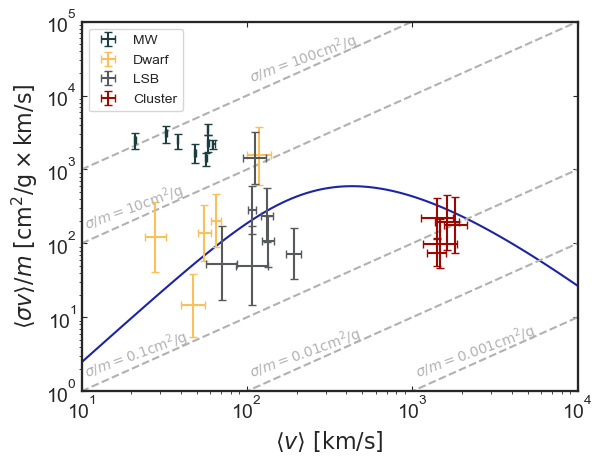

In [3]:
"""
//////////// Plots ////////////
"""




#for the plots
DwarfData = np.loadtxt('Data-Sets/DwarfDataPlot.csv', delimiter='\t')
Dwarf_x =     DwarfData[:,0]
Dwarf_y =     DwarfData[:,1]
Dwarf_Err_l = DwarfData[:,2]
Dwarf_Err_r = DwarfData[:,3]
Dwarf_Err_d = DwarfData[:,4]
Dwarf_Err_u = DwarfData[:,5]

GalaxyData = np.loadtxt('Data-Sets/GalaxyDataPlot.csv', delimiter='\t')
Galaxy_x = GalaxyData[:,0]
Galaxy_y = GalaxyData[:,1]
Galaxy_Err_l = GalaxyData[:,2]
Galaxy_Err_r = GalaxyData[:,3]
Galaxy_Err_d = GalaxyData[:,4]
Galaxy_Err_u = GalaxyData[:,5]

ClusterData = np.loadtxt('Data-Sets/ClusterDataPlot.csv', delimiter='\t')
Cluster_x = ClusterData[:,0]
Cluster_y = ClusterData[:,1]
Cluster_Err_l = ClusterData[:,2]
Cluster_Err_r = ClusterData[:,3]
Cluster_Err_d = ClusterData[:,4]
Cluster_Err_u = ClusterData[:,5]

v_array = np.logspace(1, 4, 100)
v0 = v_array*np.sqrt(np.pi)/4

sigvm_array = np.zeros(100)

for i in range(100):
    sigvm_array[i] = Average_sigmaviscosity(v0[i], 5.54, 12)
    
# Plot Best Fit

#Model Plot
plt.plot(v_array, sigvm_array, color=MainColor1)

rot = 20
#Cross section diagonals
plt.plot(v_array, 0.001*v_array, color=Gray2, linestyle='dashed')
plt.text(1000, 1.5, r'$ \sigma/m = 0.001 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)
plt.plot(v_array, 0.01*v_array, color=Gray2, linestyle='dashed')
plt.text(100, 1.5, r'$ \sigma/m = 0.01 \mathrm{cm^2/g}$', size=10, rotation= rot,color=Gray2)
plt.plot(v_array, 0.1*v_array, color=Gray2, linestyle='dashed')
plt.text(10, 1.5, r'$ \sigma/m = 0.1 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)
plt.plot(v_array, 10*v_array, color=Gray2, linestyle='dashed')
plt.text(10, 150, r'$ \sigma/m = 10 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)
plt.plot(v_array, 100*v_array, color=Gray2, linestyle='dashed')
plt.text(100, 1.5e4, r'$ \sigma/m = 100 \mathrm{cm^2/g}$', size=10, rotation= rot, color=Gray2)

#Data
plt.errorbar(VelocityData, CrossSectionData, CrossSectionData_Err , VelocityData_Err , ls='', color=BackgroundColor3, capsize=3, label='MW')
plt.errorbar(Dwarf_x, Dwarf_y, (Dwarf_Err_d, Dwarf_Err_u), (Dwarf_Err_l, Dwarf_Err_r), ls='', color=BackgroundColor2, capsize=3, label='Dwarf')
plt.errorbar(Galaxy_x, Galaxy_y, (Galaxy_Err_d, Galaxy_Err_u), (Galaxy_Err_l, Galaxy_Err_r), ls='', color=Gray1, capsize=3, label='LSB')
plt.errorbar(Cluster_x, Cluster_y, (Cluster_Err_d, Cluster_Err_u), (Cluster_Err_l, Cluster_Err_r), ls='', color=MainColor2, capsize=3, label='Cluster')

#Settings
plt.tick_params(top=True, right=True, direction='in')
plt.xlabel(r'$\langle v \rangle ~[ \mathrm{km/s}]$')
plt.ylabel(r'$\langle\sigma v \rangle /m ~[\mathrm{cm^2/g \times km/s}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 1e5)
plt.xlim(10, 1e4)
plt.legend(loc=2)
plt.savefig('Plots/GalaxyFit.pdf')
plt.savefig('Plots/GalaxyFit.svg')
plt.show()